In [85]:
import numpy as np
import IPython.display as ip
import matplotlib.pyplot as plt
import scipy.io.wavfile as rd
from scipy.fftpack import fft,ifft,fftshift

## Ej. 1

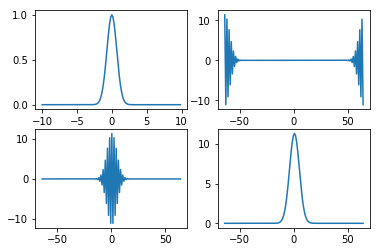

In [39]:
L = 20
n = 128
x2 = np.linspace(-L/2 , L/2, n+1)
x = x2[0:n]
frmodes = np.linspace(-n/2 , n/2, n)
u = np.exp(-x*x)
ut =fft(u)
utshift = fftshift(ut)


plt.subplot(221)
plt.plot(x,u)
plt.subplot(222)
plt.plot(frmodes,np.real(ut))
plt.subplot(223)
plt.plot(frmodes,np.real(utshift))
plt.subplot(224)
plt.plot(frmodes,abs(utshift))


plt.show()

## Ej. 2

<class 'numpy.ndarray'>


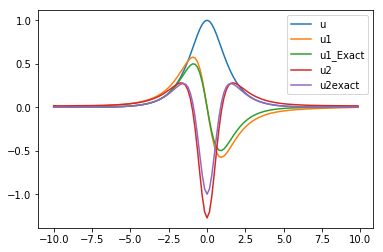

In [144]:
L = 20
n = 128
x2 = np.linspace(-L/2 , L/2, n+1)
x = x2[0:n]
dx = x[1] - x[0]
u = 1/np.cosh(x)
ut = fft(u)
k = np.append((2*np.pi/L)*np.arange(0,(n/2+1)),(2*np.pi/L)*np.arange((-n/2),-1))
ut1 = 1j*k*ut
ut2 = -k*k*ut
u1 = np.real(ifft(ut1))
u2 = np.real(ifft(ut2))
u1exact = -1/np.cosh(x) * np.tanh(x)
u2exact = 1/np.cosh(x) -2*(1/np.cosh(x))**3

ux=[]
ux2=[]

print(type(u))

ux.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
for a in range(1,n-1):
    ux.append((u[a+1]-u[a-1])/(2*dx))

ux.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))


ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))
for b in range(2,n-2):
    ux2.append((-u[b+2]+8*u[b+1]-8*u[b-1]+u[b-2])/(12*dx))

ux2.append((3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx))
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))


plt.plot(x,u,x,u1,x,u1exact,x,u2,x,u2exact)
plt.legend(["u","u1","u1_Exact","u2","u2exact"])

plt.show()

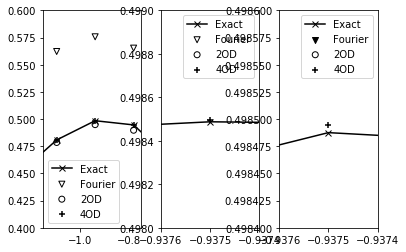

In [162]:
plt.subplot(1,3,1)
plt.plot(x,u1exact,"kx-")
plt.scatter(x,u1,marker="v",facecolors='none', edgecolors='k')
plt.scatter(x,ux,marker="o",facecolors='none', edgecolors='k')
plt.scatter(x,ux2,marker="+",facecolors='k', edgecolors='k')
plt.axis([-1.15,-0.75,0.4,0.6])
plt.legend(["Exact","Fourier","2OD","4OD",])

plt.subplot(1,3,2)
plt.plot(x,u1exact,"kx-")
plt.scatter(x,u1,marker="v",facecolors='none', edgecolors='k')
plt.scatter(x,ux,marker="o",facecolors='none', edgecolors='k')
plt.scatter(x,ux2,marker="+",facecolors='k', edgecolors='k')
plt.axis([-0.9376,-0.9374,0.498,0.499])
plt.legend(["Exact","Fourier","2OD","4OD",])


plt.subplot(1,3,3)
plt.plot(x,u1exact,"kx-")
plt.scatter(x,u1,marker="v",facecolors='k', edgecolors='k')
plt.scatter(x,ux,marker="o",facecolors='none', edgecolors='k')
plt.scatter(x,ux2,marker="+",facecolors='k', edgecolors='k')
plt.axis([-0.9376,-0.9374,0.4984,0.4986])
plt.legend(["Exact","Fourier","2OD","4OD",])

plt.show()

## Ej. 4

In [163]:
(a,b)=rd.read("./Recording.wav")
b = np.array(b)
v = []
for i in range(len(b)):
    v.append(b[i][1])


v = np.array(v)
v.reshape(1,len(v))

ip.Audio(v,rate=a)